In [1]:
# biblioteca para modelagem de dados 
import pandas as pd

# bibliotecas de plotagem de dados 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# lendo arquivo csv
base_dados = pd.read_csv('/home/whitehat000142/Documents/Repositorios/Projetos-ML/Dados/AirPassengers.csv')
base_dados.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# ajustando a coluna MES para o formato data 
base_dados['Month'] = pd.to_datetime(base_dados['Month'],infer_datetime_format=True)

#incluindo o mes como index 
base_dados=base_dados.set_index(['Month'])

/tmp/ipykernel_98067/3014821719.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  base_dados['Month'] = pd.to_datetime(base_dados['Month'],infer_datetime_format=True)


In [4]:
base_dados.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
# verificando as colunas 
for coluna in base_dados.columns:
    print(coluna)

#Passengers


In [6]:
# verificando o formato dos campos 
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
base_dados.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


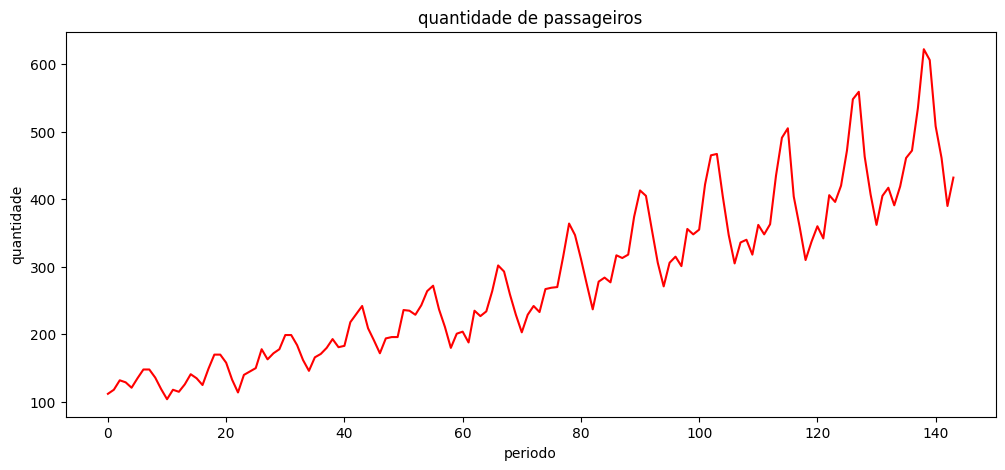

In [8]:
# separando o eixo do gráfico 
eixo_1 = base_dados['#Passengers'].values

# criando o grafico para entender a curva de cresccrccimento 
plt.figure(figsize=(12,5))
plt.title('quantidade de passageiros')
plt.xlabel('periodo')
plt.ylabel('quantidade')
plt.plot(eixo_1,color='red')

In [9]:
# treinar o modelo da serie temporal

# importando a funcao da serie 
from statsmodels.tsa.api import ExponentialSmoothing
#  definindo os parametros
funcao_serie_temporal = ExponentialSmoothing(base_dados,seasonal_periods=12,
                                             trend='additive',seasonal='additive',
                                            use_boxcox=True).fit()

/home/whitehat000142/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


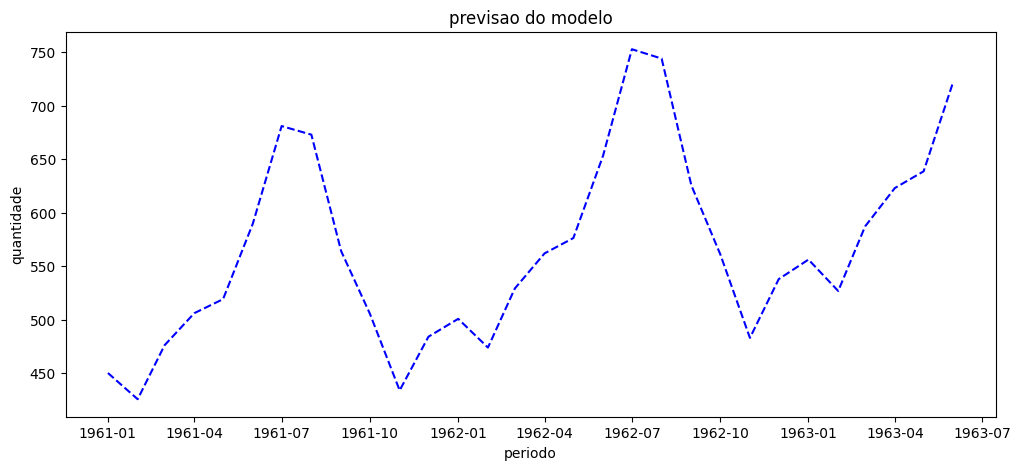

In [10]:
# definindo os dias para serem previstos 
quantos_dias_quer_prever = 30

# fazendo a previsao usando o metodo 'forecast'
previsao = funcao_serie_temporal.forecast(quantos_dias_quer_prever)

# criando o grafico com a previsao 
plt.figure(figsize=(12,5))
plt.title('previsao do modelo')
plt.xlabel('periodo')
plt.ylabel('quantidade')
plt.plot(previsao,color='blue',linestyle='--')

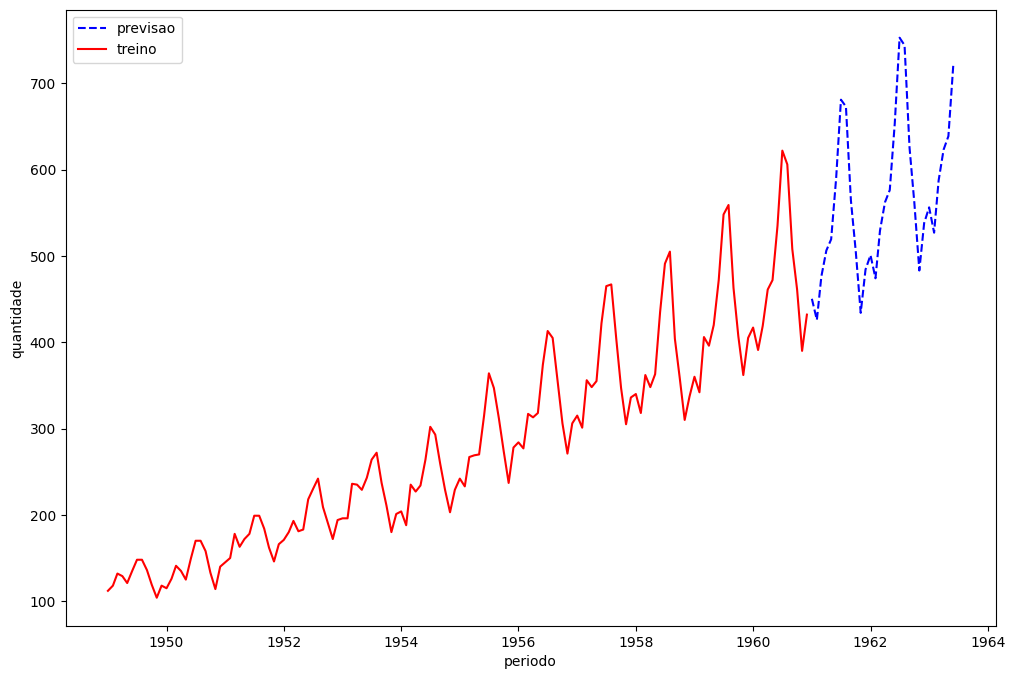

In [11]:
# criando o grafico com a previsao e o treino 
plt.figure(figsize=(12,8))
plt.plot(previsao,label='previsao',color='blue',linestyle='--')
plt.plot(base_dados['#Passengers'],label='treino',color='red',linestyle='-')
plt.xlabel('periodo')
plt.ylabel('quantidade')
plt.legend(loc=0)

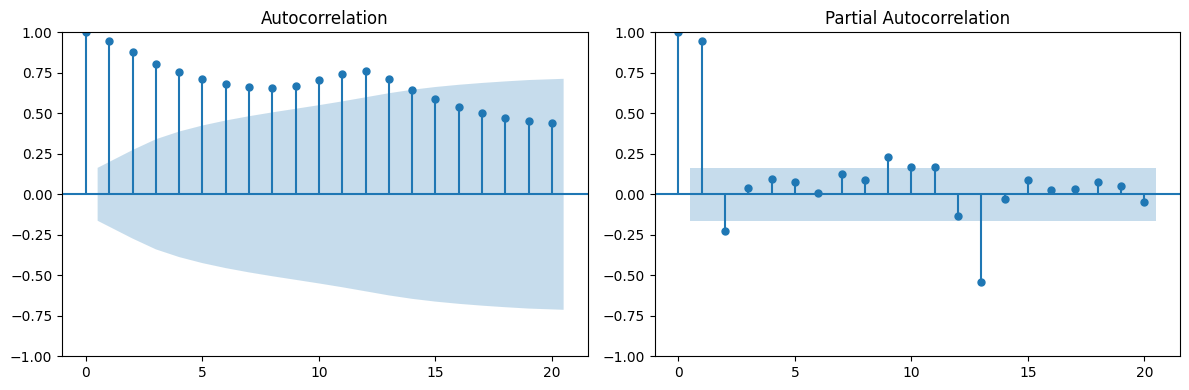

In [12]:
# verificando o diagrama de autocorrelacao 
# verificando o diagrama de autocorrelacao parcial 

# importando a funcao smt para gerar as correlacoes
import statsmodels.tsa.api as smt 

# definindo uma figura de linha 1 e 2 colunas 
fig, axes = plt.subplots(1,2)
# fixando o tamanho dos graficos
fig.set_figwidth(12)
fig.set_figheight(4)
# plotando o grafico da autocorrelacao 
smt.graphics.plot_acf(base_dados,lags=20,ax=axes[0])
# plotando o grafico da autocorrelacao parcial
smt.graphics.plot_pacf(base_dados,lags=20,ax=axes[1])
plt.tight_layout()